In [2]:
#Libraries
import numpy as np
from statistics import mean
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix

#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm

#Selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

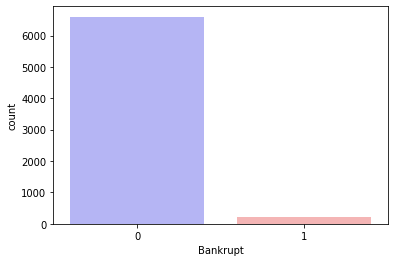

Bankrupt
0    6599
1     220
dtype: int64

In [4]:
data = pd.read_csv('C:/Users/ASUS/Desktop/data.csv')
sns.countplot(data=data, x='Bankrupt', palette='bwr')
plt.show()

data.groupby('Bankrupt').size()

In [3]:
#Input and ouputs
y = data['Bankrupt']
X= data.drop('Bankrupt',axis=1)

In [6]:
#Test
model_params = {
    'neighrest neighbors': {
        
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1,2,3,4,5],
            'weights': ['uniform','distance'],
            'metric': ['euclidean','manhattan']
        }  
    },
    
    'decision_tree' : {
        'model':DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy'],
            'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14,15]
    }
},
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
        
    
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

scores = []

for model_name, mp in model_params.items():
    grid =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    grid.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_
    })
    
grid_predictions = grid.predict(X)

print(classification_report(y, grid_predictions)) 

    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(df)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6599
           1       0.14      0.02      0.03       220

    accuracy                           0.96      6819
   macro avg       0.55      0.51      0.51      6819
weighted avg       0.94      0.96      0.95      6819

                 model  best_score  \
0  neighrest neighbors    0.966711   
1        decision_tree    0.965831   
2        random_forest    0.964072   
3  logistic_regression    0.962018   

                                         best_params  
0  {'metric': 'manhattan', 'n_neighbors': 4, 'wei...  
1              {'criterion': 'gini', 'max_depth': 3}  
2                               {'n_estimators': 10}  
3                                           {'C': 1}  


Values of bankrupt column :
0    6599
1     220
Name: Bankrupt, dtype: int64
Values of bankrupt column after SMOTE :
Counter({1: 6599, 0: 6599})


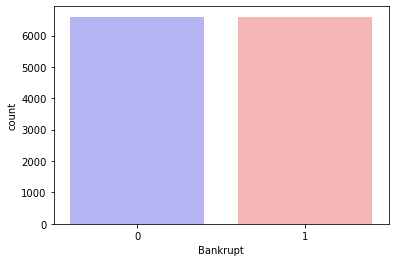

In [25]:
#Oversampling

print("Values of bankrupt column :")
print(data['Bankrupt'].value_counts())
oversample = SMOTE()
X_oversamp, y_oversamp = oversample.fit_resample(X, y)
counter = Counter(y_oversamp)
print("Values of bankrupt column after SMOTE :")
print(counter)
sns.countplot(data=X_oversamp, x=y_oversamp, palette='bwr')
plt.show()

In [17]:
#Test oversampling
model_params = {
    'neighrest neighbors': {
        
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1,2,3,4,5],
            'weights': ['uniform','distance'],
            'metric': ['euclidean','manhattan']
        }  
    },
     'decision_tree' : {
        'model':DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy'],
            'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14,15]
    }
},
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
        
    
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

scores = []

for model_name, mp in model_params.items():
    grid =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    grid.fit(X_oversamp, y_oversamp)
    scores.append({
        'model': model_name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_
    })
    
grid_predictions = grid.predict(X_oversamp)

print(classification_report(y_oversamp, grid_predictions)) 

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(df)

              precision    recall  f1-score   support

           0       0.59      0.75      0.66      6599
           1       0.66      0.48      0.55      6599

    accuracy                           0.61     13198
   macro avg       0.62      0.61      0.61     13198
weighted avg       0.62      0.61      0.61     13198

                 model  best_score  \
0  neighrest neighbors    0.945221   
1        decision_tree    0.950753   
2        random_forest    0.972952   
3  logistic_regression    0.593658   

                                         best_params  
0  {'metric': 'manhattan', 'n_neighbors': 1, 'wei...  
1          {'criterion': 'entropy', 'max_depth': 15}  
2                               {'n_estimators': 10}  
3                                           {'C': 1}  


In [26]:
model = grid.best_estimator_
confusion_matrix(y_oversamp,model.predict(X_oversamp))

ValueError: X has 95 features per sample; expecting 15

Values of bankrupt column :
0    6599
1     220
Name: Bankrupt, dtype: int64
Counter({0: 440, 1: 220})


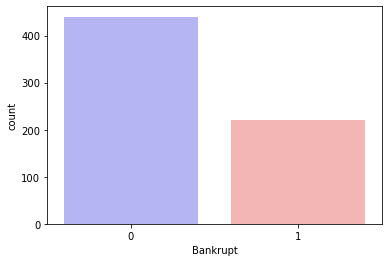

In [13]:
#Undersampling
print("Values of bankrupt column :")
print(data['Bankrupt'].value_counts())
under = RandomUnderSampler(sampling_strategy=0.5)
X_undersamp, y_undersamp = under.fit_resample(X, y)
counter = Counter(y_undersamp)
print(counter)
sns.countplot(data=X_undersamp, x=y_undersamp, palette='bwr')
plt.show()


In [15]:
#Test undersampling
model_params = {
    'neighrest neighbors': {
        
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1,2,3,4,5],
            'weights': ['uniform','distance'],
            'metric': ['euclidean','manhattan']
        }  
    },
     'decision_tree' : {
        'model':DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy'],
            'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14,15]
    }
},
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
        
    
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

scores = []

for model_name, mp in model_params.items():
    grid =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    grid.fit(X_undersamp, y_undersamp)
    scores.append({
        'model': model_name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_
    })
    
grid_predictions = grid.predict(X_undersamp) 
   
# print classification report 
print(classification_report(y_undersamp, grid_predictions)) 

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(df)

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       440
           1       0.58      0.19      0.28       220

    accuracy                           0.68       660
   macro avg       0.64      0.56      0.54       660
weighted avg       0.66      0.68      0.63       660

                 model  best_score  \
0  neighrest neighbors    0.695455   
1        decision_tree    0.845455   
2        random_forest    0.857576   
3  logistic_regression    0.646970   

                                         best_params  
0  {'metric': 'euclidean', 'n_neighbors': 2, 'wei...  
1           {'criterion': 'entropy', 'max_depth': 3}  
2                               {'n_estimators': 10}  
3                                           {'C': 1}  


In [27]:
model = grid.best_estimator_
confusion_matrix(y_undersamp,model.predict(X_undersamp))

ValueError: X has 95 features per sample; expecting 15

In [18]:
selector = SelectKBest (chi2, k=15)
selector.fit_transform (X_undersamp, y_undersamp)
names = X.columns.values[selector.get_support()]
print(names)

X_undersamp_fe=X_undersamp[names]

selector = SelectKBest (chi2, k=15)
selector.fit_transform (X_oversamp, y_oversamp)
names = X.columns.values[selector.get_support()]
print(names)
X_oversamp_fe=X_oversamp[names]

[' Operating Expense Rate' ' Total Asset Growth Rate'
 ' Net Value Growth Rate' ' Quick Ratio' ' Total debt/Total net worth'
 ' Fixed Assets Turnover Frequency' ' Revenue per person'
 ' Allocation rate per person' ' Quick Assets/Current Liability'
 ' Cash/Current Liability' ' Inventory/Current Liability'
 ' Long-term Liability to Current Assets' ' Quick Asset Turnover Rate'
 ' Fixed Assets to Assets' ' Total assets to GNP price']
[' Operating Expense Rate' ' Research and development expense rate'
 ' Interest-bearing debt interest rate' ' Total Asset Growth Rate'
 ' Net Value Growth Rate' ' Quick Ratio'
 ' Inventory Turnover Rate (times)' ' Fixed Assets Turnover Frequency'
 ' Revenue per person' ' Cash/Current Liability'
 ' Current Asset Turnover Rate' ' Quick Asset Turnover Rate'
 ' Cash Turnover Rate' ' Fixed Assets to Assets'
 ' Total assets to GNP price']


In [20]:
#Test oversampling
model_params = {
    'neighrest neighbors': {
        
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1,2,3,4,5],
            'weights': ['uniform','distance'],
            'metric': ['euclidean','manhattan']
        }  
    },
     'decision_tree' : {
        'model':DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy'],
            'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14,15]
    }
},
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
        
    
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

scores = []

for model_name, mp in model_params.items():
    grid =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    grid.fit(X_oversamp_fe, y_oversamp)
    scores.append({
        'model': model_name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_
    })
    
grid_predictions = grid.predict(X_oversamp_fe)

print(classification_report(y_oversamp, grid_predictions)) 
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(df)

              precision    recall  f1-score   support

           0       0.59      0.75      0.66      6599
           1       0.65      0.47      0.55      6599

    accuracy                           0.61     13198
   macro avg       0.62      0.61      0.60     13198
weighted avg       0.62      0.61      0.60     13198

                 model  best_score  \
0  neighrest neighbors    0.943781   
1        decision_tree    0.929841   
2        random_forest    0.960224   
3  logistic_regression    0.590324   

                                         best_params  
0  {'metric': 'manhattan', 'n_neighbors': 1, 'wei...  
1             {'criterion': 'gini', 'max_depth': 15}  
2                               {'n_estimators': 10}  
3                                           {'C': 5}  


In [22]:
#Test undersampling
model_params = {
    'neighrest neighbors': {
        
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1,2,3,4,5],
            'weights': ['uniform','distance'],
            'metric': ['euclidean','manhattan']
        }  
    },
     'decision_tree' : {
        'model':DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy'],
            'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14,15]
    }
},
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
        
    
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

scores = []

for model_name, mp in model_params.items():
    grid =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    grid.fit(X_undersamp_fe, y_undersamp)
    scores.append({
        'model': model_name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_
    })
    
grid_predictions = grid.predict(X_undersamp_fe)

print(classification_report(y_undersamp, grid_predictions)) 
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
print(df)


              precision    recall  f1-score   support

           0       0.69      0.88      0.77       440
           1       0.45      0.19      0.27       220

    accuracy                           0.65       660
   macro avg       0.57      0.54      0.52       660
weighted avg       0.61      0.65      0.60       660

                 model  best_score  \
0  neighrest neighbors    0.721212   
1        decision_tree    0.850000   
2        random_forest    0.834848   
3  logistic_regression    0.633333   

                                         best_params  
0  {'metric': 'euclidean', 'n_neighbors': 5, 'wei...  
1              {'criterion': 'gini', 'max_depth': 3}  
2                               {'n_estimators': 10}  
3                                           {'C': 1}  
